In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [2]:
torch.cuda.is_available()

True

In [3]:
image=Image.open('horse025b.png')
transform=transforms.Compose([transforms.ToTensor()])
image_tensor=transform(image)
#resize=transforms.Resize((84,128))
#image_tensor=resize(image_tensor[0])

In [4]:
image_tensor=(image_tensor-image_tensor.mean())/image_tensor.std()
print(f'Mean: {image_tensor.mean()}\nStandard Deviation: {image_tensor.std()}')

Mean: -6.226556337196598e-08
Standard Deviation: 1.0


In [5]:
class NNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(10752, 128)
        self.relu = nn.ReLU()
        self.out=nn.Linear(128,10752)
        
    def forward(self, x):
        x=x.view(x.size(0),-1)
        x=self.layer1(x)
        x=F.relu(x)
        x=self.out(x)
        return x     

In [16]:
model=NNModel()
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.003)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)
epochs=300
batches=64
losses=[]
data_loader=DataLoader(dataset=image_tensor,batch_size=batches,shuffle=True)
for i in range(epochs):
    for batch in data_loader:
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch.view(batch.size(0), -1))
        loss.backward()
        optimizer.step()
    scheduler.step()
    losses.append(loss.item())

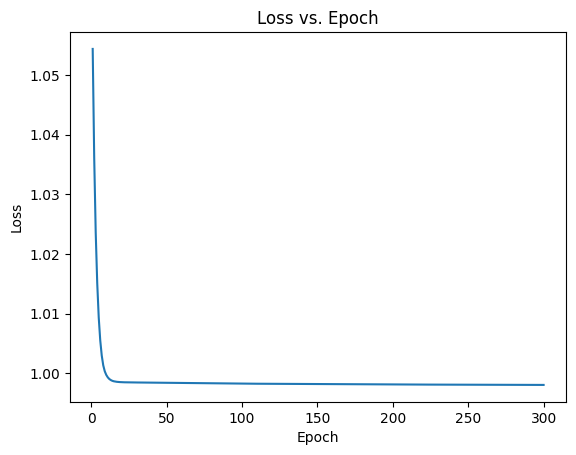

In [17]:
plt.plot(range(1, epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()